In [1]:

# import tensorflow as tf
import pandas as pd
from glob import glob
from collection.Collection import collect4
from json import loads
import numpy as np
from matplotlib import pyplot as plt


# Answers load

# data load 

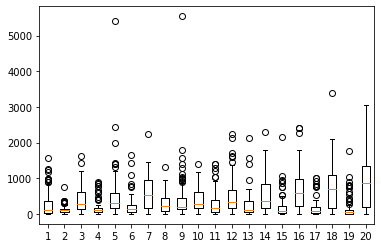

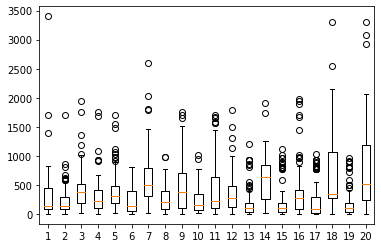

1.0 1.0


In [10]:
files = glob("./data/LOBdata*.csv")
# files = [i for i in files if int(i[9:-4]) >= 17]
df1  = pd.concat([pd.read_csv(i) for i in files],ignore_index=True)
df1 = df1.drop(df1.columns[:2],axis=1)
# df1 = df1[df1.columns[2:]]
city = df1[df1.coin=='CITY']
city = city[city['label']==1]
m = np.array(loads(city.iloc[0].matrix))
plt.boxplot(m[:,1::2])
plt.show()
m = np.array(loads(city.iloc[1].matrix))
plt.boxplot(m[:,1::2])
plt.show()
print(city.iloc[0].label,city.iloc[1].label)
# m = np.array(loads(city.iloc[1].matrix))
# fig = plt.figure(figsize=(20,10))
# plt.boxplot(m)
# plt.show()

In [5]:
coin  = 'CITYUSDT'

df1 = df1[df1.coin == coin]
# df1.sort_index(['starttime'])
# list(df1.starttime)


In [9]:
dfs  = []
for i in range(len(df1)//60):
    d = df1[i*60:(i+1)*60]
    dfs.append(d)

X = []
Y = []

for df in dfs:
    ms = []
    for m in df['matrix']:
        ms.append(loads(m))
    X.append(ms)
    t = int(df.iloc[len(df)-1].starttime)*1000
    data = collect4(coin,'1h',t,endtime=t+1000*60*60*10,limit=10)
    Y.append(np.reshape(np.array(data,dtype=float)[0:,1:5],(40)))
    

X = np.reshape(np.array(X),(28,1,60,28))
Y = np.array(Y)


In [13]:
X = np.reshape(np.array(X),(28,1,60,28))
X.shape,Y.shape

((28, 1, 60, 28), (28, 40))

In [14]:
nn = torch.nn
class mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        m1 = nn.Conv2d(16, 16, (2,28), stride=1)
        m2 = nn.Conv2d(16, 8, (10,1), stride=(2,1))
        m3 = nn.Conv2d(8, 4, (10,1), stride=(2,1))
        m4 = nn.Conv2d(4, 2, (3,1), stride=(2,1))
        m5 = nn.Conv2d(2, 1, (2,1), stride=(2,1))
        self.layers = [m1,m2,m3,m4,m5]
        self.fc1 = nn.Linear(20,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,40)
        
    def forward(self,x):
        y = x
        for l in self.layers:
            y = l(y)
        y = self.fc1(y.flatten())
        y = self.fc2(y)
        y = self.fc3(y)
        return y
    
        

In [29]:
# With square kernels and equal stride
m1 = nn.Conv2d(16, 16, (2,28), stride=1)
m2 = nn.Conv2d(16, 8, (10,1), stride=(2,1))
m3 = nn.Conv2d(8, 4, (10,1), stride=(2,1))
m4 = nn.Conv2d(4, 2, (3,1), stride=(2,1))
m5 = nn.Conv2d(2, 1, (2,1), stride=(2,1))
layers = [m1,m2,m3,m4,m5]
# non-square kernels and unequal stride and with padding
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
# non-square kernels and unequal stride and with padding and dilation
# m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
i = torch.randn(20, 16, 60, 28)
res=  None
for l in layers:
    if res is not None:
        print(res.shape)
        res = l(res)
    else:
        res = l(i)

res.flatten()

torch.Size([20, 16, 59, 1])
torch.Size([20, 8, 25, 1])
torch.Size([20, 4, 8, 1])
torch.Size([20, 2, 3, 1])


tensor([0.1895, 0.1719, 0.3366, 0.2338, 0.2202, 0.2283, 0.2030, 0.2199, 0.2522,
        0.0956, 0.2822, 0.3242, 0.1920, 0.1326, 0.3192, 0.2718, 0.2675, 0.1831,
        0.3389, 0.2305], grad_fn=<ReshapeAliasBackward0>)

In [36]:
i = torch.randn(20)
m = [nn.Linear(20,128),nn.Linear(128,64),nn.Linear(64,40)]
y = i
for l in m:
    y = l(y)
y

tensor([-0.3735, -0.2593,  0.1333, -0.1950, -0.2672, -0.0240,  0.1623,  0.1532,
         0.0328,  0.0430, -0.0104,  0.1061,  0.2158, -0.1193, -0.2836, -0.0622,
         0.3445,  0.1953, -0.0698, -0.2014, -0.1046, -0.1382,  0.2193, -0.2195,
        -0.0491,  0.0809,  0.0939, -0.2630, -0.1907, -0.0065, -0.0117,  0.1499,
        -0.1065,  0.0898,  0.1486,  0.1092, -0.1692, -0.1769,  0.0457, -0.1305],
       grad_fn=<AddBackward0>)